# Predicting Student Exam Scores Using Regression Analysis and Python
### Project Overview
This project analyzes how different study habits impact final exam scores.
Using Python, I build linear regression models to predict final grade ("G3") based on the study habits from the UCI Student Performance dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
plt.style.use('seaborn-v0_8')

## Dataset Information
UCI Machine Learning Repository — Student Performance Dataset
https://archive.ics.uci.edu/dataset/320/student+performanc
- 395 student records
- 33 features
- No missing values
- Target variable: "G3", the final exam grade on a scale from (0-20)e

## Data Cleaning
### Steps:
- Loaded dataset using 'sep=";"' (the UCI dataset uses semicolons)
- Selected relavant study habit features
- Converted binary "yes/no" fields to numeric (0/1)
- Created final dataset for modeling

In [4]:
df = pd.read_csv("student-mat.csv", sep=";")
print(df.head())
print(df.columns)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       '

In [5]:
print(df.head())
print(df.info())
print(df.describe())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (to

In [6]:
features = [
    "studytime",
    "absences",
    "schoolsup",
    "famsup",
    "paid",
    "higher",
    "internet",
    "health",
    "G1",
    "G2"
]

In [7]:
binary_cols = ["schoolsup", "famsup", "paid", "higher", "internet"]
for col in binary_cols:
    df[col] = df[col].map({"yes": 1, "no": 0})

In [8]:
target = "G3"

In [9]:
data = df[features + [target]].copy()

## Exploratory Data Analysis
- Understand relationships between features and final exam scores
- Visualize correlations and distributions
- Indentify most effective features
### Visualizations:
- Correlation heatmap
- Study Time vs Final Grade scatterplot
### Oberservations:
- Study time shows positive realtionship with final exam score
- Previous grades ("G1", "G2") high correlate with final result
- Absences slightly negatively correlated with performance

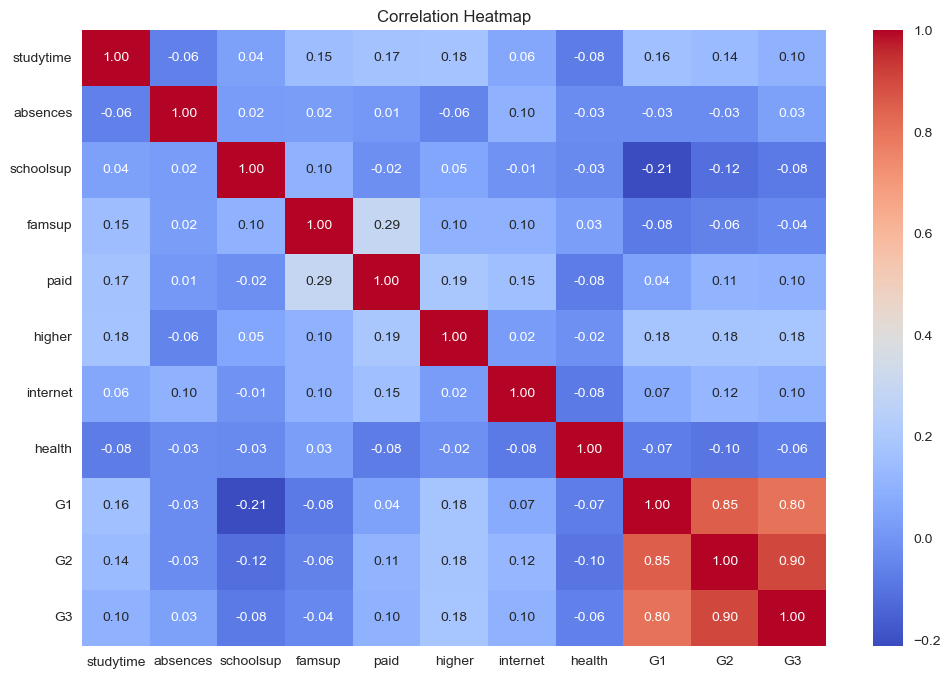

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

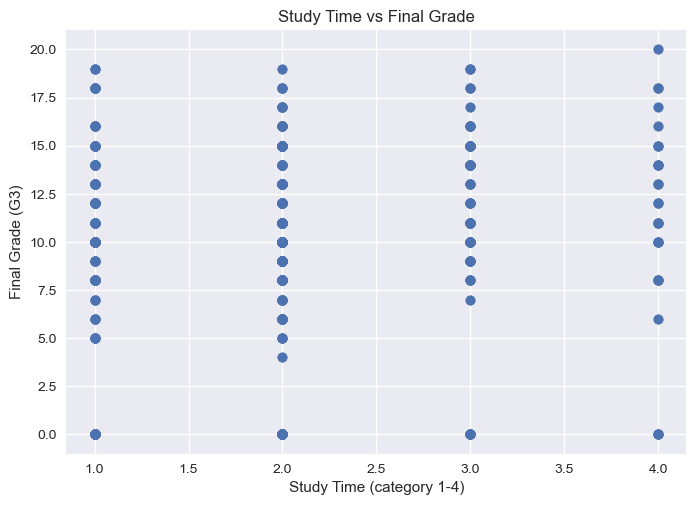

In [11]:
plt.scatter(data["studytime"], data["G3"])
plt.xlabel("Study Time (category 1-4)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs Final Grade")
plt.show()

## Simple Linear Regression Model
- Predict final exam score ("G3") using only "studytime"
### Metrics Recorded:
- R^2
- Mean absolute error (MAE)
- Root mean squared error (RMSE)

In [12]:
X_simple = data[["studytime"]]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X_simple, y, test_size=0.2, random_state=1)
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)
y_pred_simple = lr_simple.predict(X_test)

In [13]:
print("\n--- Simple Linear Regression (studytime only) ---")
print("Coefficient:", lr_simple.coef_[0])
print("Intercept:", lr_simple.intercept_)
print("R²:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))


--- Simple Linear Regression (studytime only) ---
Coefficient: 0.7507927519818796
Intercept: 8.900283125707816
R²: -0.0558794335642423
MAE: 2.659610505038921
RMSE: 3.7994502960564684


## Mutliple Linear Regression Model
- Predict final exam score ("G3") using multiple study habit features
Features Included:
"studytime", "absences", "schoolsup", "famsup", "paid", "higher", "internet", "health", "G1", "G2"
### Purpose:
- Imporve accuracy
- Indentify strongest predictors
#### Metrics Recorded:
- R^2
- MAE- RMSE
- Coefficients table


In [14]:
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
print("\n--- Multiple Linear Regression ---")
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)
print("R²:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


--- Multiple Linear Regression ---
Coefficients: [-0.12486303  0.03961069  0.79926801  0.2620334   0.11868528  0.35616754
 -0.21557402  0.08257051  0.20998022  0.97295514]
Intercept: -3.081742365414108
R²: 0.7848841976595818
MAE: 1.3913823824642635
RMSE: 2.100228486402901


In [16]:
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
})
print("\nCoefficient Table:\n", coef_df)


Coefficient Table:
      Feature  Coefficient
0  studytime    -0.124863
1   absences     0.039611
2  schoolsup     0.799268
3     famsup     0.262033
4       paid     0.118685
5     higher     0.356168
6   internet    -0.215574
7     health     0.082571
8         G1     0.209980
9         G2     0.972955


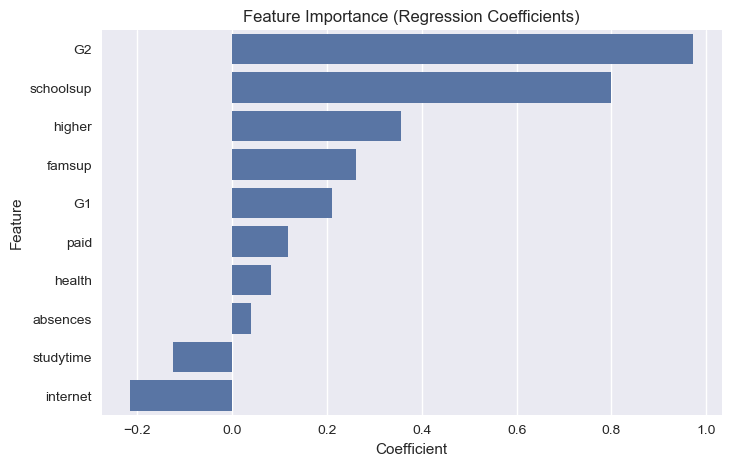

In [19]:
coef_plot = coef_df.sort_values(by="Coefficient", ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=coef_plot, x="Coefficient", y="Feature")
plt.title("Feature Importance (Regression Coefficients)")
plt.show()

## Interpretation of Results
- Previous grades ("G1", "G2") are the strongest predictors of final exam score
- Study time contributes positively but less than prior performanc.
- Absences show a negative effect, suggesting attendance mattes.
- Extra class(" (`p"id`) or family support features show smaller influece.

In [17]:
print("\n--- Summary ---")
print(f"Simple Linear Regression R²: {r2_score(y_test, y_pred_simple):.3f}")
print(f"Multiple Linear Regression R²: {r2_score(y_test, y_pred):.3f}")
print("Model improved significantly with multiple predictors.")


--- Summary ---
Simple Linear Regression R²: -0.018
Multiple Linear Regression R²: 0.785
Model improved significantly with multiple predictors.


## Actual vs Predicted Performance Visualization
A scatter plot comparing real exam scores to model predictions helps evaluate regression fit visually


Text(0.5, 1.0, 'Actual vs Predicted Exam Scores')

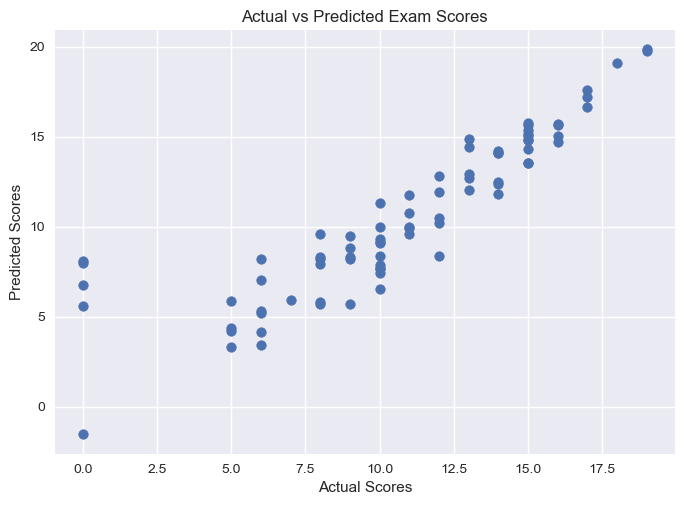

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted Exam Scores")

## Conclusion
This project demonstrates how study habits relate to academic performance using regression modeling
### Summary:
- Built simple and multiple regression models using Python
- Multiple regression performed significantly better than the simple model
- Strong predictors: previous scores, study time, attendance
- Model provides insight into which habits help improve grades

